# Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

##### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_excel('compactiv.xlsx',engine='openpyxl')

In [3]:
data

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.20,40671.0,53995.0,0.00,...,0.00,0.0,1.60,2.60,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.20,448.0,8385.0,0.00,...,0.00,0.0,0.00,0.00,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.40,NaN,31950.0,0.00,...,0.00,1.2,6.00,9.40,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.20,NaN,8670.0,0.00,...,0.00,0.0,0.20,0.20,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.40,NaN,12185.0,0.00,...,0.00,0.0,1.00,1.20,37.80,47.60,Not_CPU_Bound,633,1760253,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,16,12,3009,360,244,1.6,5.81,405250.0,85282.0,8.02,...,55.11,0.6,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,...,0.20,0.8,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.6,0.60,325948.0,52640.0,0.40,...,0.00,0.4,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.2,1.20,62571.0,29505.0,1.40,...,18.04,0.4,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83


In [4]:
data.shape

(8192, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


##### Univariate Analysis

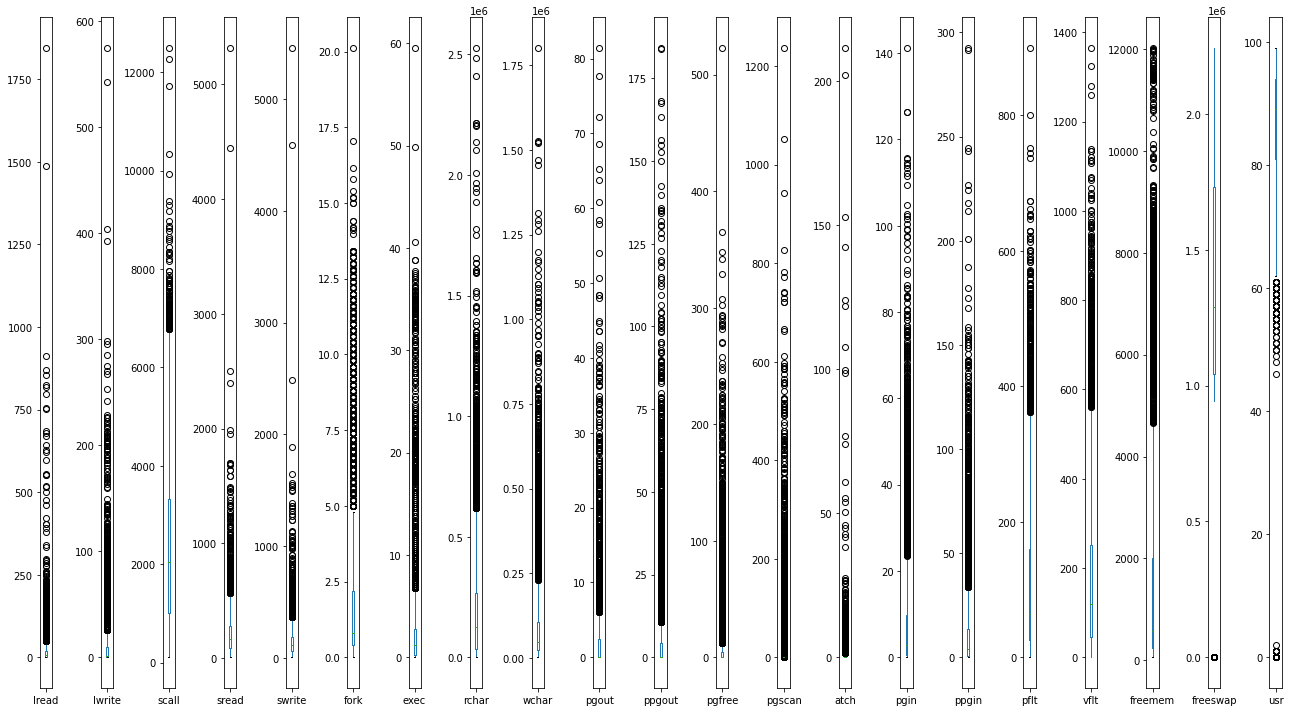

In [7]:
data.plot(kind='box',subplots= True, figsize=(18,10))
plt.tight_layout();

* We can say all the features are having left-skewed distribution. ‘usr’ feature is having right-skewed distribution

##### Bivariate Analysis

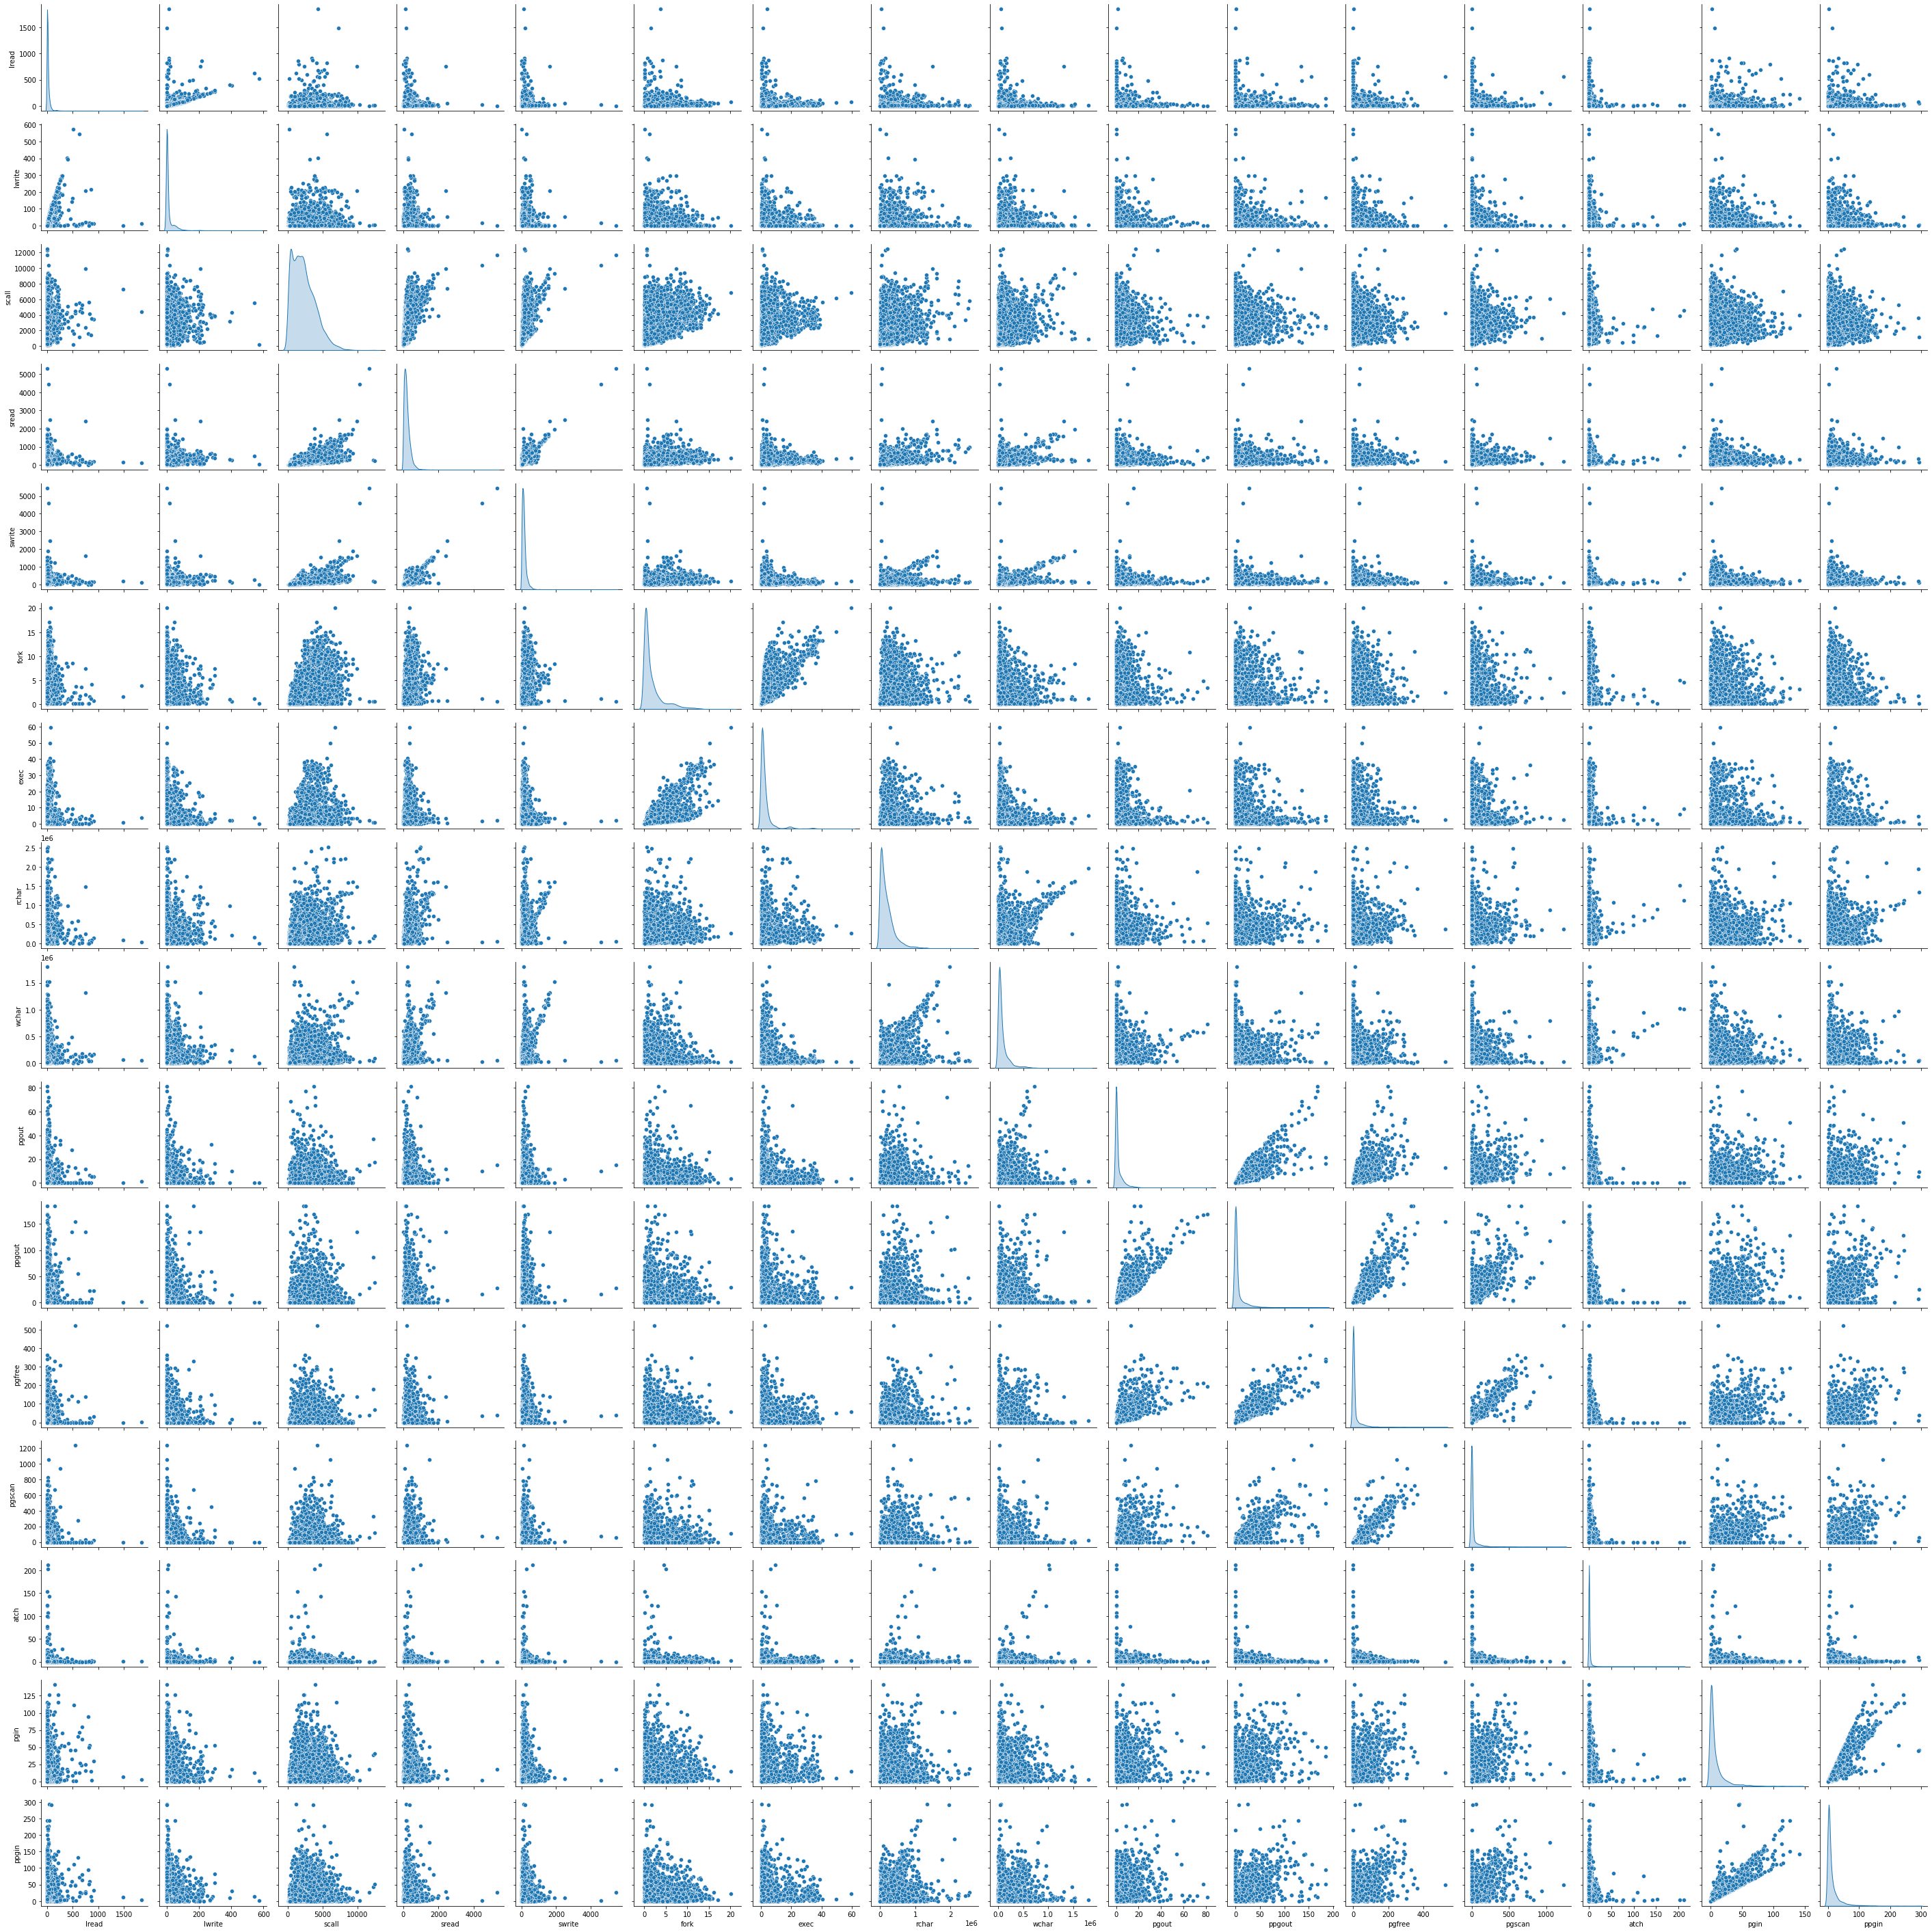

In [8]:
data_attr = data.iloc[:, 0:16]
sns.pairplot(data_attr, diag_kind="kde")

##### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [9]:
data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

* We can see we have null values for ‘rchar’ and ‘wchar’, As it is a continuous variable, mean value can be imputed. 
* Let's replace the missing values with mean values of the columns. Every column's missing value is replaced with that column's mean respectively

In [10]:
data['rchar'] = data['rchar'].fillna(data['rchar'].mean())
data['wchar'] = data['wchar'].fillna(data['wchar'].mean())

In [11]:
data.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [12]:
(data == 0).sum(axis=0)

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64

* We can keep the 0(Zero's) in our dataset for further analysis as we have some features in our dataset which can be 0(Zero) if the system stays Idle

In [13]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64


In [14]:
data = pd.get_dummies(data, columns=["runqsz"],drop_first=True)
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


##### From the Univariate analysis we can clearly see that outliers are present in the dataset, so we need to treat those outliers.

In [15]:
feature_list = data.columns

In [16]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for i in data.columns:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

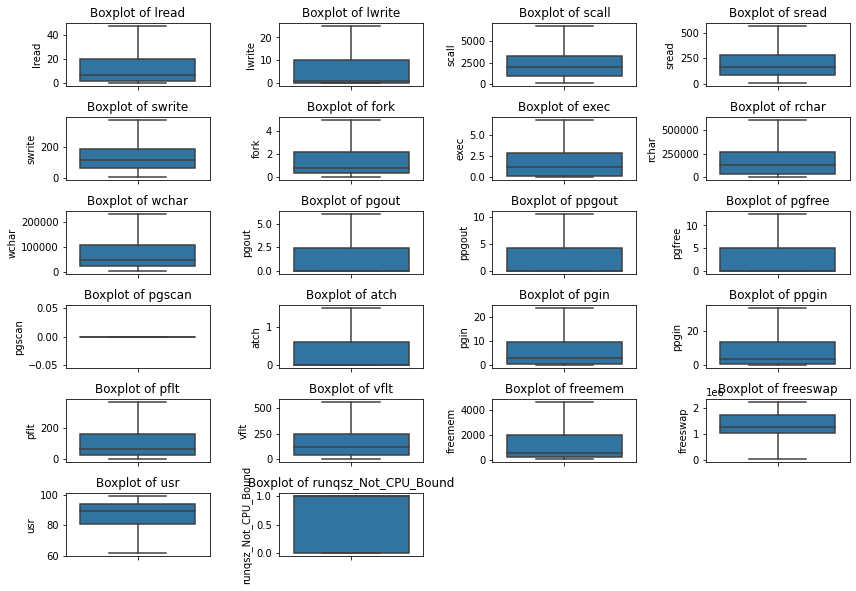

In [18]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### There are no duplicate values in the dataframe 

In [19]:
data.duplicated().sum()

0

##### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning

In [20]:
# independent variables
X = data.drop(["usr"], axis=1)
# dependent variable
y = data[["usr"]]

In [21]:
# let's add the intercept to data
X = sm.add_constant(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [23]:
print(X_train.head())

      const  lread  lwrite   scall  sread  swrite  fork  exec     rchar  \
694     1.0    1.0     1.0  1345.0  223.0   192.0   0.6   0.6  198703.0   
5535    1.0    1.0     1.0  1429.0   87.0    67.0   0.2   0.2    7163.0   
4244    1.0   47.0    25.0  3273.0  225.0   180.0   0.6   0.4   83246.0   
2472    1.0   13.0     8.0  4349.0  300.0   191.0   2.8   3.0   96009.0   
7052    1.0   17.0    23.0   225.0   13.0    13.0   0.4   1.6   17132.0   

           wchar  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  \
694   230625.875  ...   12.50     0.0   1.5  3.80   7.40   28.20   56.60   
5535   24842.000  ...    0.00     0.0   0.0  1.60   1.60   15.77   30.74   
4244   53705.000  ...    7.19     0.0   1.5  3.99   4.59   59.88   74.05   
2472   70467.000  ...    0.00     0.0   0.0  2.80   3.20  129.00  236.80   
7052   12514.000  ...    0.00     0.0   0.0  0.00   0.00   19.80   23.80   

      freemem   freeswap  runqsz_Not_CPU_Bound  
694     121.0  1375446.0                   

In [24]:
print(X_test.head())

      const  lread  lwrite   scall  sread  swrite  fork  exec     rchar  \
3894    1.0   27.0    25.0  1252.0   53.0   118.0   0.2   0.2   26592.0   
4276    1.0    1.0     0.0   996.0   85.0    55.0   0.4   0.4   16667.0   
3414    1.0    9.0     7.0  1530.0  247.0   135.0   0.4   0.4   14513.0   
4165    1.0   32.0     4.0  3243.0  182.0   140.0   4.9   5.6  337517.0   
7385    1.0   16.0     3.0  5017.0  259.0   249.0   2.8   1.4   73537.0   

           wchar  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  \
3894   54394.000  ...     0.0     0.0   0.0   0.4    0.6   19.44   20.04   
4276   36431.000  ...     0.0     0.0   0.0   1.0    1.4   35.53   52.10   
3414   61905.000  ...    12.5     0.0   1.5  14.8   18.4   26.80  186.20   
4165   94832.000  ...     1.0     0.0   1.4   4.6    7.0  250.60  420.20   
7385  230625.875  ...     0.0     0.0   0.0   5.6    5.8  142.80  276.20   

       freemem   freeswap  runqsz_Not_CPU_Bound  
3894  4659.125  1875466.0                 

In [25]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [26]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:11:11   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314 

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.239441
lread                    5.350218
lwrite                   4.328116
scall                    2.960756
sread                    6.415575
swrite                   5.594100
fork                    13.035282
exec                     3.241124
rchar                    2.129470
wchar                    1.583532
pgout                   11.359771
ppgout                  29.404123
pgfree                  16.497072
pgscan                        NaN
atch                     1.876238
pgin                    13.809962
ppgin                   13.951564
pflt                    12.001532
vflt                    15.968862
freemem                  1.961657
freeswap                 1.841358
runqsz_Not_CPU_Bound     1.157096
dtype: float64



C:\Users\ruchi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [28]:
X_train2 = X_train.drop(["sread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [29]:
X_train3 = X_train.drop(["fork"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [30]:
X_train1 = X_train.drop(["pgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train1)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [31]:
X_train4 = X_train.drop(["ppgout"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [32]:
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [33]:
X_train6 = X_train.drop(["pgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [34]:
X_train7 = X_train.drop(["ppgin"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [35]:
X_train8 = X_train.drop(["pflt"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.785


In [36]:
X_train9 = X_train.drop(["vflt"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [37]:
X_train = X_train.drop(["sread","fork","pgout","ppgout","pgfree","pgin","ppgin","pflt","vflt"], axis=1)

In [38]:
olsmod_10 = sm.OLS(y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1467.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:11:11   Log-Likelihood:                -17373.
No. Observations:                5734   AIC:                         3.477e+04
Df Residuals:                    5722   BIC:                         3.485e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.8421 

In [39]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   27.057194
lread                    4.853662
lwrite                   4.030061
scall                    2.638341
swrite                   2.554885
exec                     1.560986
rchar                    1.587694
wchar                    1.465441
pgscan                        NaN
atch                     1.363399
freemem                  1.845245
freeswap                 1.707063
runqsz_Not_CPU_Bound     1.143330
dtype: float64



C:\Users\ruchi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [40]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_10.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_10.resid.values  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
0,91.0,88.820295,2.179705
1,94.0,91.451953,2.548047
2,61.5,74.421350,-12.921350
3,83.0,80.231368,2.768632
4,94.0,97.418365,-3.418365


## Predictions

#### Let's print the linear regression equation.

In [41]:
# let's check the model parameters
olsres_10.params

const                   8.484212e+01
lread                  -1.590308e-01
lwrite                  1.687254e-01
scall                  -5.261212e-04
swrite                 -2.122557e-02
exec                   -1.596255e+00
rchar                  -8.685264e-06
wchar                   1.010197e-06
pgscan                 -6.101187e-16
atch                   -2.431170e-01
freemem                -5.225177e-04
freeswap                8.455354e-06
runqsz_Not_CPU_Bound    1.264189e+00
dtype: float64

In [42]:
# Let us write the equation of linear regression
Equation = "mpg ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_10.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_10.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_10.params[i], "* (", X_train.columns[i], ")")

mpg = 84.84212350392049 + -0.1590307965560091 * ( lread ) +  0.16872540941639527 * ( lwrite ) +  -0.000526121150139315 * ( scall ) +  -0.021225569510229893 * ( swrite ) +  -1.5962548685849485 * ( exec ) +  -8.685263526467457e-06 * ( rchar ) +  1.0101968288690516e-06 * ( wchar ) +  -6.101187435763784e-16 * ( pgscan ) +  -0.24311700514614687 * ( atch ) +  -0.0005225177093287615 * ( freemem ) +  8.455353605450072e-06 * ( freeswap ) +  1.264188935030807 * ( runqsz_Not_CPU_Bound )


#### We can now use the model for making predictions on the test data.

In [43]:
X_train.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgscan', 'atch', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [44]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [45]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(["sread","fork","pgout","ppgout","pgfree","pgin","ppgin","pflt","vflt"], axis=1)

In [46]:
# let's make predictions on the test set
y_pred = olsres_10.predict(X_test2)

In [47]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

5.007457099062038

In [48]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

5.266779235103411

In [49]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

3.755823994512177

In [50]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

3.9354528055507147

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict mpg within a mean error of 3.9 units on the test data.
* Hence, we can conclude the model "ols_res10" is good for prediction as well as inference purposes.

## Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

###### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [52]:
df1 = pd.read_excel('Contraceptive_method_dataset.xlsx',engine='openpyxl')

In [53]:
df1.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [55]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [56]:
df1.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [57]:
df1['Wife_age'] = df1['Wife_age'].fillna(df1['Wife_age'].mean())
df1['No_of_children_born'] = df1['No_of_children_born'].fillna(df1['No_of_children_born'].mean())

In [58]:
df1.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [59]:
df1.duplicated().sum()

80

In [60]:
df1=df1.drop_duplicates(keep='first')

In [61]:
df1.duplicated().sum()

0

##### Univariate Analysis

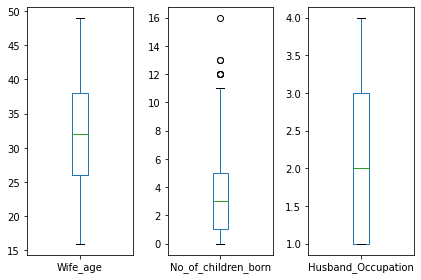

In [62]:
df1.plot(kind='box',subplots= True)
plt.tight_layout();

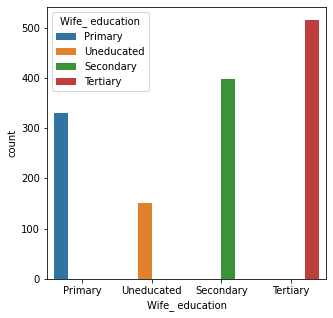

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Wife_ education'],hue=df1['Wife_ education'])
plt.show()

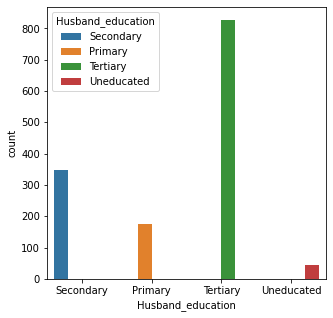

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Husband_education'],hue=df1['Husband_education'])
plt.show()

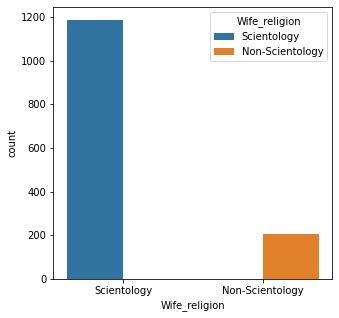

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Wife_religion'],hue=df1['Wife_religion'])
plt.show()

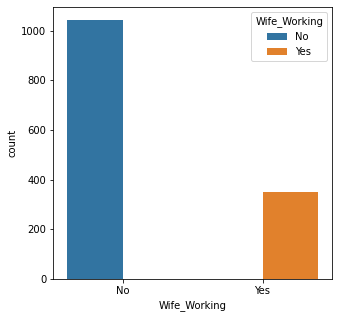

In [66]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Wife_Working'],hue=df1['Wife_Working'])
plt.show()

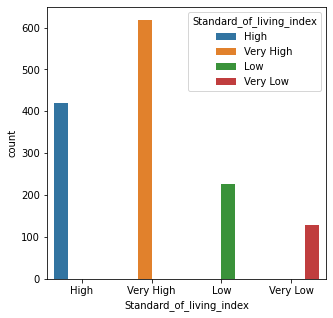

In [67]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Standard_of_living_index'],hue=df1['Standard_of_living_index'])
plt.show()

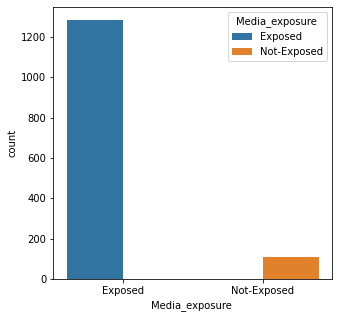

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Media_exposure '],hue=df1['Media_exposure '])
plt.show()

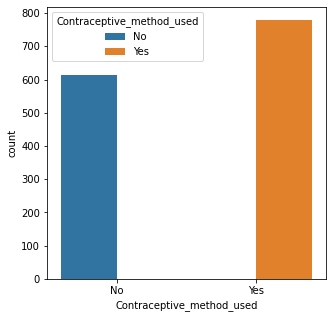

In [69]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['Contraceptive_method_used'],hue=df1['Contraceptive_method_used'])
plt.show()

#### Bivariate Analysis

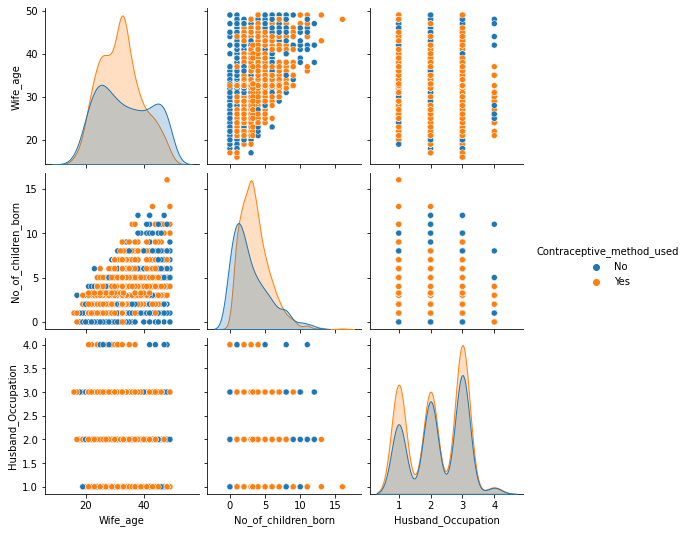

In [70]:
sns.pairplot(df1, diag_kind="kde", hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Wife_ education', ylabel='No_of_children_born'>

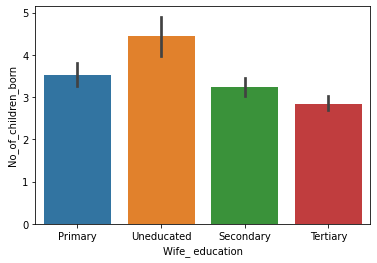

In [71]:
sns.barplot(x=df1['Wife_ education'], y=df1['No_of_children_born'])

<AxesSubplot:xlabel='Husband_education', ylabel='No_of_children_born'>

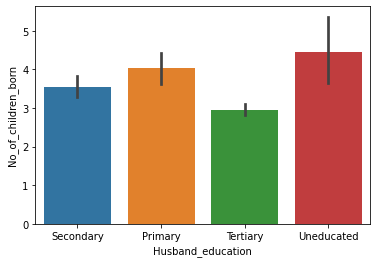

In [72]:
sns.barplot(x=df1['Husband_education'], y=df1['No_of_children_born'])

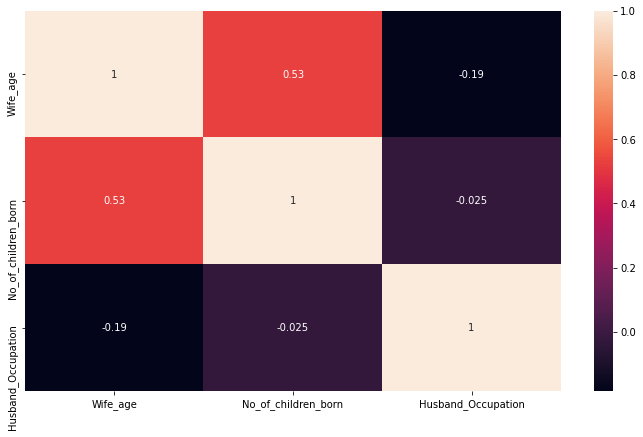

In [73]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(), annot=True);

##### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [74]:
df1["Wife_ education"] = df1["Wife_ education"].replace({"Uneducated":1, "Primary":2, "Secondary":3, "Tertiary":4})
df1["Husband_education"] = df1["Husband_education"].replace({"Uneducated":1, "Primary":2, "Secondary":3, "Tertiary":4})
df1["Wife_religion"] = df1["Wife_religion"].replace({"Non-Scientology":1, "Scientology":2})
df1["Wife_Working"] = df1["Wife_Working"].replace({"Yes":1, "No":2})
df1["Standard_of_living_index"] = df1["Standard_of_living_index"].replace({"Very Low":1, "Low":2, "Very High":3, "High":4})
df1["Media_exposure "] = df1["Media_exposure "].replace({"Exposed":1, "Not-Exposed":2})
df1["Contraceptive_method_used"] = df1["Contraceptive_method_used"].replace({"Yes":1, "No":2})
df1.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,2,2,2,4,1,2
1,45.0,1,3,10.0,2,2,3,3,1,2
2,43.0,2,3,7.0,2,2,3,3,1,2
3,42.0,3,2,9.0,2,2,3,4,1,2
4,36.0,3,3,8.0,2,2,3,2,1,2


In [75]:
#df1["Media_exposure "] = df1["Media_exposure "].astype(int)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 159.7 KB


### Train Test Split

In [77]:
# Copy all the predictor variables into X dataframe
X = df1.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df1['Contraceptive_method_used']

In [78]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df1['Contraceptive_method_used'])

In [79]:
y_train.value_counts(1)

1    0.558974
2    0.441026
Name: Contraceptive_method_used, dtype: float64

In [80]:
y_test.value_counts(1)

1    0.559809
2    0.440191
Name: Contraceptive_method_used, dtype: float64

##### Fit the Logistic Regression model

In [81]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

##### Fit the LDA model

In [87]:
model1 = LinearDiscriminantAnalysis()
model1.fit(X_train,y_train)

LinearDiscriminantAnalysis()

##### Fit the CART model

In [86]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Logistic Regression

In [88]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [89]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.772801,0.227199
1,0.594563,0.405437
2,0.636493,0.363507
3,0.510243,0.489757
4,0.281144,0.718856


In [90]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6728205128205128

* AUC and ROC for the training data

#### AUC and ROC for the training data

AUC: 0.697


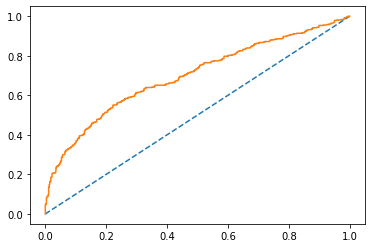

In [101]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=model.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [104]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6411483253588517

##### AUC and ROC for the testing data

AUC: 0.697


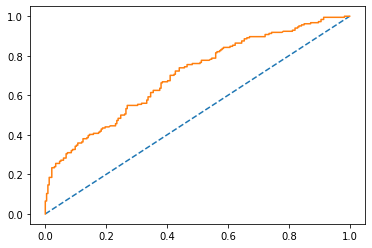

In [103]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=model.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

In [159]:
confusion_matrix(y_train, ytrain_predict)

array([[528,  17],
       [ 49, 381]], dtype=int64)

In [160]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[528,  17],
       [ 49, 381]], dtype=int64)

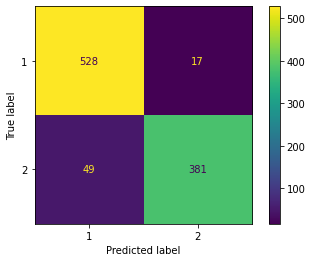

In [161]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [162]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           1       0.92      0.97      0.94       545
           2       0.96      0.89      0.92       430

    accuracy                           0.93       975
   macro avg       0.94      0.93      0.93       975
weighted avg       0.93      0.93      0.93       975



#### Confusion Matrix for test data

In [163]:
confusion_matrix(y_test, ytest_predict)

array([[169,  65],
       [ 81, 103]], dtype=int64)

In [164]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[169,  65],
       [ 81, 103]], dtype=int64)

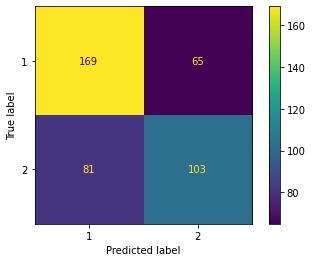

In [165]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [166]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           1       0.68      0.72      0.70       234
           2       0.61      0.56      0.59       184

    accuracy                           0.65       418
   macro avg       0.64      0.64      0.64       418
weighted avg       0.65      0.65      0.65       418



##### LDA Model

In [93]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)

#### Confusion matrix on the training data

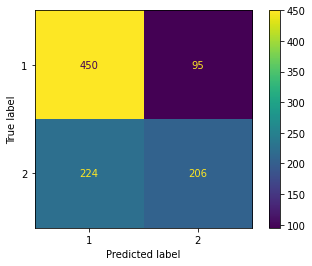

In [94]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

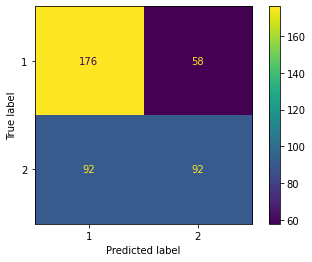

In [95]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

In [96]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           1       0.67      0.83      0.74       545
           2       0.68      0.48      0.56       430

    accuracy                           0.67       975
   macro avg       0.68      0.65      0.65       975
weighted avg       0.68      0.67      0.66       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           1       0.66      0.75      0.70       234
           2       0.61      0.50      0.55       184

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.64       418
 



In [128]:
# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test)

AUC for the Training Data: 0.697
AUC for the Test Data: 0.701


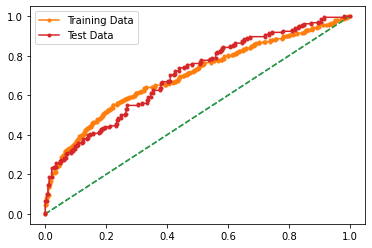

In [131]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=model.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=model.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [132]:
pred_prob_train[:,1]

array([0.46019166, 0.22779717, 0.21893142, 0.12409458, 0.56987102,
       0.34568358, 0.23041945, 0.54324404, 0.54109107, 0.13157544,
       0.71641944, 0.36188665, 0.49709256, 0.40054292, 0.41639213,
       0.59021076, 0.54620902, 0.24129607, 0.56909193, 0.27661619,
       0.80418671, 0.23640317, 0.52239789, 0.64919932, 0.13229616,
       0.40837208, 0.46907497, 0.49114592, 0.61676151, 0.824492  ,
       0.66275456, 0.4481981 , 0.66403857, 0.73130125, 0.25989718,
       0.31596334, 0.61497771, 0.66202519, 0.28796358, 0.48611649,
       0.53317732, 0.40722246, 0.24560411, 0.72901068, 0.3972643 ,
       0.42645758, 0.61971229, 0.30138839, 0.18254032, 0.32394452,
       0.51825824, 0.58750457, 0.53159028, 0.47100428, 0.49158868,
       0.31235482, 0.4898666 , 0.19016413, 0.19964322, 0.39367106,
       0.43596703, 0.60590188, 0.30286612, 0.55042012, 0.24183897,
       0.40503829, 0.30322635, 0.36182288, 0.28414252, 0.41952141,
       0.24722242, 0.32488701, 0.24512394, 0.29887061, 0.35002

In [141]:
#intercept value
clf.intercept_

array([-0.09835029])

In [134]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[ 0.07044434, -0.52953745, -0.07527616, -0.27449178,  0.29338532,
        -0.12098295, -0.00772357, -0.16975399,  0.40980356]])

In [135]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [136]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[ 0.07, -0.53, -0.08, -0.27,  0.29, -0.12, -0.01, -0.17,  0.41]])

In [137]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_test_lda = lda_model.transform(X_test)

In [143]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(975, 1)
(418, 1)


In [145]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)



In [147]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           1       0.65      0.74      0.69       234
           2       0.60      0.50      0.55       184

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.62       418
weighted avg       0.63      0.63      0.63       418
 



#### CART Model

In [105]:
y_predict = dt_model.predict(X_test)

In [106]:
y_predict.shape

(418,)

In [115]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:    9.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [110]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=20, max_features='auto',
                       random_state=1024)

In [111]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=15,
                       max_features='auto',
                           random_state=1024)
reg_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       max_features='auto', random_state=1024)

In [116]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [117]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [118]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [119]:
ytest_predict

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,

In [120]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.53333333, 0.46666667],
       [0.68965517, 0.31034483],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.77777778, 0.22222222],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [121]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.533333,0.466667
1,0.689655,0.310345
2,1.000000,0.000000
3,1.000000,0.000000
4,0.000000,1.000000


#### AUC and ROC for the training data

AUC: 0.987


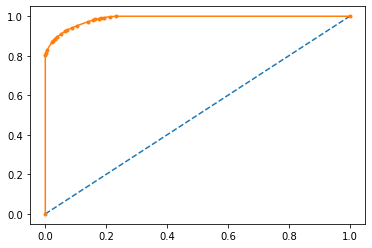

In [124]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs,pos_label=model.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.645


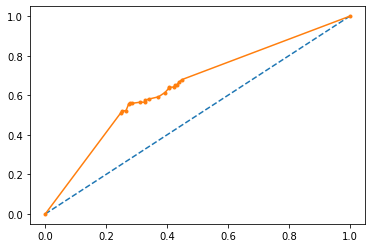

In [126]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=model.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [149]:
confusion_matrix(y_train, ytrain_predict)

array([[528,  17],
       [ 49, 381]], dtype=int64)

In [150]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train) 

0.9323076923076923

In [152]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           1       0.92      0.97      0.94       545
           2       0.96      0.89      0.92       430

    accuracy                           0.93       975
   macro avg       0.94      0.93      0.93       975
weighted avg       0.93      0.93      0.93       975



In [154]:
confusion_matrix(y_test, ytest_predict)

array([[169,  65],
       [ 81, 103]], dtype=int64)

In [156]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.6507177033492823

In [158]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           1       0.68      0.72      0.70       234
           2       0.61      0.56      0.59       184

    accuracy                           0.65       418
   macro avg       0.64      0.64      0.64       418
weighted avg       0.65      0.65      0.65       418

